In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import sparse
from sklearn.utils.multiclass import unique_labels

In [22]:
SRC_PATH = './data/'

stop_words = [word.strip() for word in open(SRC_PATH + 'stop_words.txt').readlines()]

with open(SRC_PATH + 'liberal.txt', 'r') as file:
   liberal_text = [line.strip('\n') for line in file]
with open(SRC_PATH + 'labor.txt', 'r') as file:
   labor_text = [line.strip('\n') for line in file]



In [23]:
vectorizer = CountVectorizer(input='content', stop_words=stop_words, strip_accents='unicode', max_features=1000)

In [24]:
X = vectorizer.fit(liberal_text, labor_text)

In [25]:
liberal = vectorizer.transform(liberal_text)
labor = vectorizer.transform(labor_text)

x = sparse.vstack((liberal,labor))
y = np.hstack((np.zeros(2000), np.ones(2000)))

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1972)

In [27]:
naive_bayes = BernoulliNB()
model = naive_bayes.fit(x_train, y_train)

In [28]:
y_pred = model.predict(x_test)

In [29]:
accuracy_score(y_test, y_pred)

0.833

In [30]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

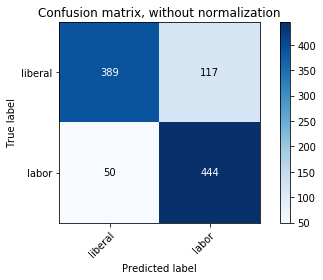

In [31]:
parties = np.array(["liberal","labor"])
plot_confusion_matrix(y_test, y_pred, classes=parties)

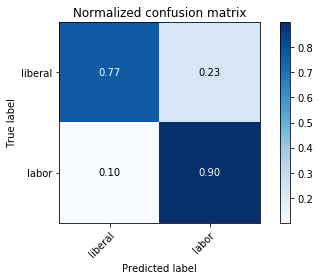

In [32]:
plot_confusion_matrix(y_test, y_pred, classes=parties, normalize=True)